In [ ]:
import pandas as pd
import numpy as np
import joblib
from joblib import dump, load
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score, make_scorer)
import tensorflow as tf
from tensorflow import keras
np.random.seed(1)
tf.random.set_seed(1)
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV, train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report , f1_score, make_scorer, precision_score, recall_score, accuracy_score,f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score


import nltk
nltk.download('stopwords')
stopwords_es = nltk.corpus.stopwords.words('spanish')

import nltk
import string

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_train = pd.read_csv("train_normalizado.csv", engine = "python", error_bad_lines=False)

In [ ]:
df_copy_id = df_train['ID']
df_train.drop(columns = (['sentimiento','ID']))

,review_es,sentimiento_1
0,críticos mencionado después ver solo 1 oz epis...,1
1,pequeña pequeña producción técnica filmación i...,1
2,pensé manera maravillosa pasar tiempo fin sema...,1
3,básicamente familia niño pequeño jake piensa z...,0
4,amor tiempo petter mattei película visualmente...,1
...,...,...
23234,peter coyote único nombre reconocí lista proye...,1
23235,odio personas cine hablan nuevo pantalla razon...,0
23236,película dennis hopper gary busey erika elenia...,1
23237,ahorre dinero sido fan fullmoon productions ti...,0


In [ ]:
def metricas(y_pred,y_test):

  print(classification_report(y_pred,y_test))

  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
df_train_x = df_train['review_es']

#Creo un dataset con la variable target
df_train_y = df_train['sentimiento_1'].copy()

#Genero los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(df_train_x,
                                                    df_train_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2,
                                                    stratify=df_train_y.values) #semilla

##Voting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

In [ ]:
nb_model_h = make_pipeline(TfidfVectorizer(ngram_range =(1, 2)), MultinomialNB(alpha = 0.2))

In [ ]:
#Entrenamos el modelo
nb_model_h.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB(alpha=0.2))])

xgboost


In [ ]:
import xgboost as xg_boost
xg_model_H = make_pipeline(TfidfVectorizer(ngram_range =(1, 2)), xg_boost.XGBClassifier(n_estimators = 350 ,learning_rate = 0.2, max_depth = 7))
xg_model_H.fit(x_train,y_train)# podes sacar el fit total emperora el resultadp de kaggle y tarda el doble

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=350, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
R_f_H = make_pipeline(TfidfVectorizer(ngram_range =(1, 2)), RandomForestClassifier(max_depth= 70, min_samples_split = 20,n_estimators =400))
R_f_H.fit(x_train,y_train)# podes sacar el fit total emperora el resultadp de kaggle y tarda el doble

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=70, min_samples_split=20,
                                        n_estimators=400))])

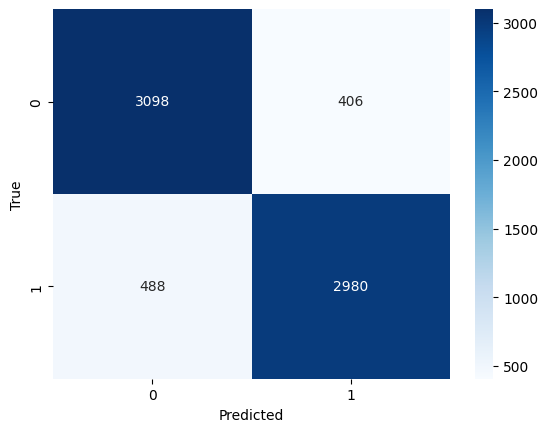

In [ ]:
#Creo clasificadores
nb_clf = nb_model_h
xgb_H_clf = xg_model_H
rnd_clf = R_f_H


#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('nb', nb_clf),('xgb', xgb_H_clf),('rnd', rnd_clf)], voting = 'hard')

#Armo conjunto entrenamiento y test 70-30
x_train_Vt, x_test_Vt, y_train_Vt, y_test_Vt = train_test_split(df_train_x,
                                                    df_train_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2,
                                                    stratify=df_train_y.values)


#Entreno el ensemble
vot_clf.fit(x_train_Vt, y_train_Vt)

#Evaluo en conjunto de test
pred = vot_clf.predict(x_test_Vt)
metricas(pred,y_test_Vt)

##Preprocesamiento

In [ ]:
df_test  = pd.read_csv("test_normalizado.csv", engine="python")
df_copy_id_test = df_test['ID'] #copio el id y lo quito del dataframe
df_test.drop(['ID'], axis='columns', inplace=True)
df_test.head(5)

,review_es
0,mayor virtud película existencia hecho podamos...
1,experto cinéfilo pocas veces tan juego sala ci...
2,si incondicional humor estilo tele 5 si termin...
3,sé pasando si gente deja llevar modas si verda...
4,"amanece,y quedo solo,siento fondoun mar vacío,..."


##submit Kaggle

In [ ]:
y_submit_R_f = vot_clf.predict(df_test['review_es'])

In [ ]:
df_submit_test = pd.DataFrame({'ID': df_copy_id_test,'sentimiento':y_submit_R_f})
df_submit_test['sentimiento'] = np.where(df_submit_test['sentimiento'] == 1, 'positivo', 'negativo')

df_submit_test.to_csv('Submit_test.csv',index = False)